<a href="https://colab.research.google.com/github/Vakhranev/MGIMO/blob/main/14%20%D1%84%D0%B5%D0%B2%D1%80%D0%B0%D0%BB%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Описательный анализ данных

**Группирование данных и нормальное распределение**

Это занятие **для начинающих** посвящено описательным статистикам, группированию данных и нормальному распределению. Ряд постов по теме на Хабре см. [здесь](https://habr.com/ru/articles/556000/).

Столбец с данными об электорате Electorate показывает суммарное число зарегистрированных избирателей в каждом избирательном округе:

In [23]:
import scipy as sp
from scipy import stats  # модуль статистических функций
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pd.read_excel('UK2010.xls')

,Press Association Reference,Constituency Name,Region,Election Year,Electorate,Votes,AC,AD,AGS,APNI,...,UKIP,UPS,UV,VCCA,Vote,Wessex Reg,WRP,You,Youth,YRDPL
0,1.0,Aberavon,Wales,2010.0,50838.0,30958,NaN,NaN,NaN,NaN,...,489.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,Aberconwy,Wales,2010.0,44593.0,29966,NaN,NaN,NaN,NaN,...,632.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,Aberdeen North,Scotland,2010.0,64808.0,37701,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,Aberdeen South,Scotland,2010.0,64031.0,43034,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,Aberdeenshire West & Kincardine,Scotland,2010.0,66110.0,45195,NaN,NaN,NaN,NaN,...,397.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,647.0,Ynys Mon,Wales,2010.0,50075.0,34444,NaN,NaN,NaN,NaN,...,1201.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
647,648.0,York Central,Yorkshire and the Humber,2010.0,76439.0,46483,NaN,NaN,NaN,NaN,...,1100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
648,649.0,York Outer,Yorkshire and the Humber,2010.0,75939.0,53300,NaN,NaN,NaN,NaN,...,1100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
649,650.0,Yorkshire East,Yorkshire and the Humber,2010.0,80105.0,51254,NaN,NaN,NaN,NaN,...,2142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
def load_uk():
    '''Загрузить данные по Великобритании'''
    return pd.read_excel('UK2010.xls')

In [8]:
def load_uk_scrubbed():
    '''Загрузить и отфильтровать данные по Великобритании'''
    df = load_uk()
    return df[ df[ 'Election Year' ].notnull() ]

In [9]:
def ex_1_6():
    '''Число значений в поле "Электорат"'''
    return load_uk_scrubbed()['Electorate'].count()

In [10]:
ex_1_6()

650

Мы уже очистили столбец, отфильтровав пустые значения (`nan`) из набора данных, и поэтому предыдущий пример должен вернуть суммарное число избирательных округов.

Описательные статистики, так называемые *сводные статистики*, представляют собой разные подходы к измерению свойств последовательностей чисел.

Среднее значение на самом деле представляет собой один из нескольких способов измерения *центра распределения* данных.

4495dd06da9617989fbe5319a1972386.svg

Среднее значение числового ряда вычисляется на Python следующим образом:

In [11]:
def mean(xs):
    '''Среднее значение числового ряда'''
    return sum(xs) / len(xs)

Мы можем воспользоваться нашей новой функцией `mean` для вычисления среднего числа избирателей в Великобритании:

In [12]:
def ex_1_7():
    '''Вернуть среднее значение поля "Электорат"'''
    return mean( load_uk_scrubbed()['Electorate'] )

In [13]:
ex_1_7()

70149.94

В нашем случае функцию mean, которая уже содержится в библиоттеке pandas, можно применить следующим образом:

In [14]:
load_uk_scrubbed()['Electorate'].mean()

70149.94

Если в последовательности число точек данных четное, то медиана определяется, как полусумма двух срединных значений.

In [15]:
def median(xs):
    '''Медиана числового ряда'''
    n = len(xs)
    mid = n // 2
    if n % 2 == 1:
        return sorted(xs)[mid]
    else:
        return mean( sorted(xs)[mid-1:][:2] )

Медианное значение электората Великобритании составляет:

In [16]:
def ex_1_8():
    '''Вернуть медиану поля "Электорат"'''
    return median( load_uk_scrubbed()['Electorate'] )

In [17]:
ex_1_8()

70813.5

Библиотека pandas тоже располагает встроенной функцией для вычисления медианного значения, которая так и называется `median`.

На языке математики дисперсия обозначается следующим образом:

0b9c93359e92b78696a3425945a63725.svg

где s2  — это математический символ, который часто используют для обозначения дисперсии.

Выражение

ae670e8b960092ff4386b2ce3f8b9602.svg

In [18]:
def variance(xs):
    '''Дисперсия (варианс) числового ряда,
       несмещенная дисперсия при n <= 30'''
    mu = mean(xs)
    n = len(xs)
    n = n-1 if n in range(1, 30) else n
    square_deviation = lambda x : (x - mu) ** 2
    return sum( map(square_deviation, xs) ) / n

Для вычисления квадрата выражения используется оператор языка Python возведения в степень `**`.

В результате приведения единицы измерения к более естественному виду, снова обозначающему «людей», получим так называемое *стандартное отклонение*, или среднеквадратичное отклонение:

In [24]:
def standard_deviation(xs):
    '''Стандартное отклонение числового ряда'''
    return np.sqrt( variance(xs) )

def ex_1_9():
    '''Стандартное отклонение поля "Электорат"'''
    return standard_deviation( load_uk_scrubbed()['Electorate'] )

In [25]:
ex_1_9()

7672.772645446216

В библиотеке pandas функции для вычисления дисперсии (варианса) и стандартного отклонения имплементированы соответственно, как `var` и `std`. При этом последняя по умолчанию вычисляет несмещенное значение, поэтому, чтобы получить тот же самый результат, нужно применить именованный аргумент `ddof=0`, который сообщает, что требуется вычислить смещенное значение стандартного отклонения:

In [26]:
load_uk_scrubbed()['Electorate'].std( ddof=0 )

7672.772645446216

Медиана представляет собой один из способов вычислить *срединное* значение из списка, т.е. находящееся ровно по *середине*, дисперсия же предоставляет способ измерить разброс данных вокруг среднего значения.

Для примера рассмотрим следующую ниже последовательность чисел:

`[10 11 15 21 22.5 28 30]`

0.0 (нулевой), 0.25, 0.5, 0.75 и 1.0 квантили иногда упоминаются в связи с *пятичисловой сводкой*.

Квантили можно вычислить непосредственно в pandas при помощи функции `quantile`. Последовательность требующихся квантилей передается в виде списка.

In [27]:
def ex_1_10():
    '''Вычислить квантили:
       возвращает значение в последовательности xs,
       соответствующее p-ому проценту'''
    q = [0, 1/4, 1/2, 3/4, 1]
    return load_uk_scrubbed()['Electorate'].quantile(q=q)

In [28]:
ex_1_10()

,Electorate
0.00,21780.00
0.25,65929.25
0.50,70813.50
0.75,74948.50
1.00,109922.00


Когда квантили делят диапазон на четыре равных диапазона, как показано выше, то они называются *квартилями*. Разница между нижним (0.25) и верхним (0.75) квартилями называется *межквартильным размахом*, или иногда сокращенно МКР.

В целях развития интуитивного понимания в отношении того, что именно все эти расчеты разброса значений измеряют, мы можем применить метод под названием *группировка в частотные корзины* (binning). Когда данные имеют непрерывный характер, использование специального словаря для подсчета частот `Counter` (подобно тому, как он использовался при подсчете количества пустых значений в наборе данных об электорате) становится нецелесообразным, поскольку никакие два значения не могут быть одинаковыми. Между тем, общее представление о структуре данных можно все-равно получить, сгруппировав для этого данные в частотные *корзины* (bins).

Подсчитав количества точек, попадающих в каждую корзину, мы можем получить представление о разбросе данных:

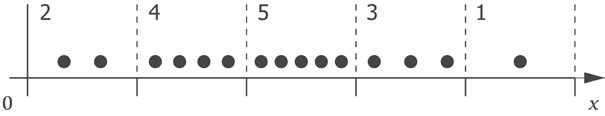

На приведенном выше рисунке показано 15 значений *x*, разбитых на 5 равноразмерных корзин.

Следующая ниже функция Python `nbin` позволяет добиться того же самого результата:

In [29]:
def nbin(n, xs):
    '''Разбивка данных на частотные корзины'''
    min_x, max_x = min(xs), max(xs)
    range_x = max_x - min_x
    fn = lambda x: min( int((abs(x) - min_x) / range_x * n), n-1 )
    return map(fn, xs)

Например, мы можем разбить диапазон 0-14 на 5 корзин следующим образом:

In [30]:
list( nbin(5, range(15)) )

[0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4]

После того, как мы разбили значения на корзины, мы можем в очередной раз воспользоваться словарем `Counter`, чтобы подсчитать количество точек в каждой корзине. В следующем ниже примере мы воспользуемся этим словарем для разбиения данных об электорате Великобритании на пять корзин:

In [33]:
from collections import Counter

def ex_1_11():
    '''Разбиmь электорат Великобритании на 5 корзин'''
    series = load_uk_scrubbed()['Electorate']
    return Counter( nbin(5, series) )

In [34]:
ex_1_11()

Counter({1: 26, 2: 450, 3: 171, 4: 1, 0: 2})

Мы уже увидели, каким образом можно выполнить разбиение данных на корзины самостоятельно, однако в библиотеке pandas уже содержится функция `hist`, которая разбивает данные и визуализирует их в виде гистограммы.

In [35]:
def ex_1_12():
    '''Построить гистограмму частотных корзин
       электората Великобритании'''
    load_uk_scrubbed()['Electorate'].hist()
    plt.xlabel('Электорат Великобритании')
    plt.ylabel('Частота')
    plt.show()

Приведенный выше пример сгенерирует следующий ниже график:

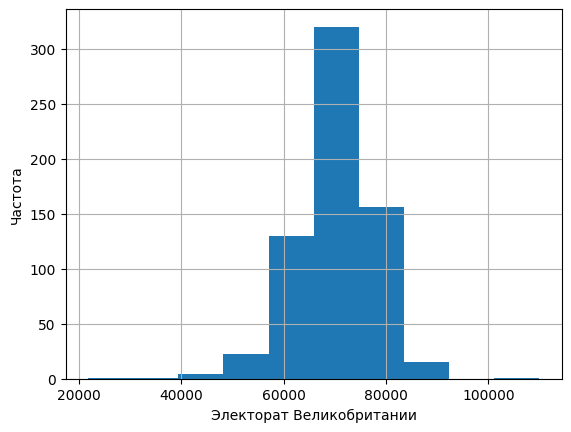

In [36]:
ex_1_12()

Число корзин, на которые данные разбиваются, можно сконфигурировать, передав в функцию при построении гистограммы именованный аргумент `bins`:

In [37]:
def ex_1_13():
    '''Построить гистограмму частотных корзин
       электората Великобритании с 200 корзинами'''
    load_uk_scrubbed()['Electorate'].hist(bins=200)
    plt.xlabel('Электорат Великобритании')
    plt.ylabel('Частота')
    plt.show()

Следующий ниже график показывает мелкие детали, но величина столбцов делает неясной форму распределения, в особенности в хвостах:

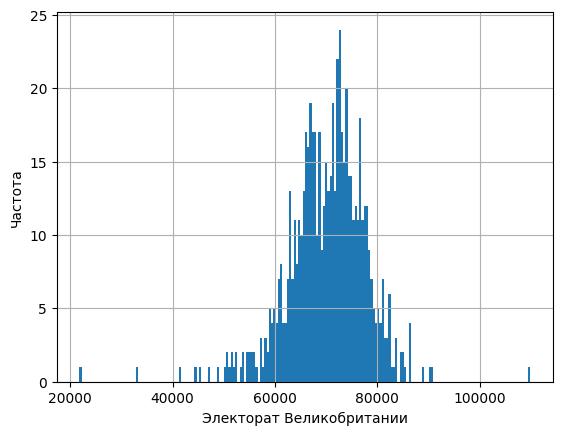

In [38]:
ex_1_13()

При выборе количества корзин для представления данных следует найти точку равновесия — с малым количеством корзин форма данных будет представлена лишь приблизительно, а слишком большое их число приведет к тому, что шумовые признаки могут заслонить лежащую в основании структуру.

In [39]:
def ex_1_14():
    '''Построить гистограмму частотных корзин
       электората Великобритании с 20 корзинами'''
    load_uk_scrubbed()['Electorate'].hist(bins=20)
    plt.xlabel('Электорат Великобритании')
    plt.ylabel('Частота')
    plt.show()

Ниже показана гистограмма теперь уже из 20 корзин:

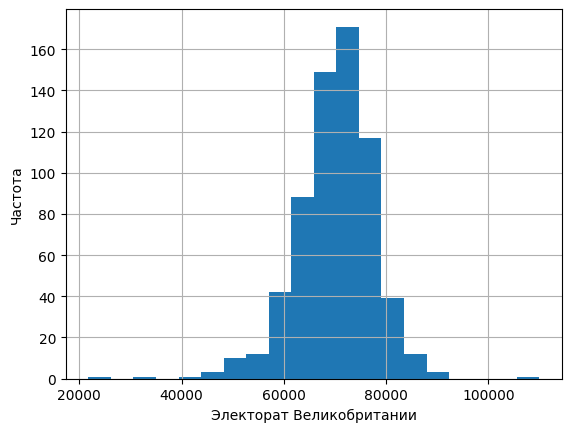

In [40]:
ex_1_14()

*Мода* — это значение, встречающееся в последовательности наиболее часто.

В анализе данных многие распределения встречаются часто, но ни одно не встречается также часто, как нормальное распределение, именуемое также *гауссовым распределением*.

В программировании типичным распределением является *равномерное* распределение. Оно представлено распределением чисел, генерируемых функцией библиотеки scipy `stats.uniform.rvs`: в справедливом генераторе случайных чисел все числа имеют равные шансы быть сгенерированными. Мы можем увидеть это на гистограмме, многократно генерируя серию случайных чисел между 0 и 1 и затем построив график с результатами.

In [41]:
def ex_1_15():
    '''Показать гистограмму равномерного распределения
       синтетического набора данных'''
    xs = stats.uniform.rvs(0, 1, 10000)
    pd.Series(xs).hist(bins=20)
    plt.xlabel('Равномерное распределение')
    plt.ylabel('Частота')
    plt.show()

Обратите внимание, что в этом примере мы впервые использовали тип `Series` библиотеки pandas для числового ряда данных.

Приведенный выше пример создаст следующую гистограмму:

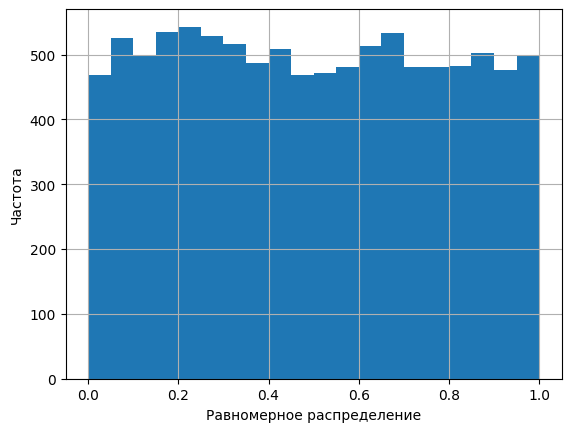

In [42]:
ex_1_15()

Если напротив сгенерировать гистограмму средних значений последовательностей чисел, то в результате получится распределение, которое выглядит совсем непохоже.

In [45]:
def bootstrap(xs, n, replace=True):
    '''Вернуть список массивов меньших размеров
       по n элементов каждый'''
    return np.random.choice(xs, (len(xs), n), replace=replace)

def ex_1_16():
    '''Построить гистограмму средних значений'''
    xs = stats.uniform.rvs(loc=0, scale=1, size=10000)
    pd.Series( map(np.mean, bootstrap(xs, 10)) ).hist(bins=20)
    plt.xlabel('Распределение средних значений')
    plt.ylabel('Частота')
    plt.show()

Приведенный выше пример сгенерирует результат, аналогичный следующей ниже гистограмме:

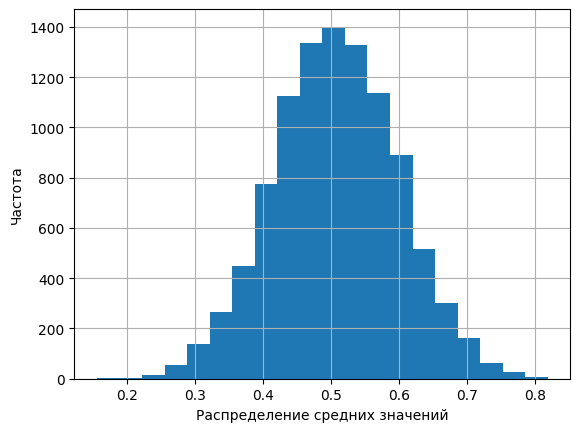

In [46]:
ex_1_16()

Этот результат, когда средний эффект множества мелких случайных колебаний в итоге приводит к нормальному распределению, называется *центральной предельной теоремой*, иногда сокращенно *ЦПТ*, и играет важную роль для объяснения, почему нормальное распределение встречается так часто в природных явлениях.

В отличие от центральной предельной теоремы, которая позволяет получать выборки из приближенно нормального распределения, библиотека scipy содержит функции для эффективного генерирования выборок из самых разнообразных статистических распределений, включая нормальное:

In [47]:
def ex_1_17():
    '''Показать гистограмму нормального распределения
       синтетического набора данных'''
    xs = stats.norm.rvs(loc=0, scale=1, size=10000)
    pd.Series(xs).hist(bins=20)
    plt.xlabel('Нормальное распределение')
    plt.ylabel('Частота')
    plt.show()

Отметим, что в функции `sp.random.normal` параметр `loc` – это среднее значение, `scale` – дисперсия и `size` – размер выборки. Приведенный выше пример сгенерирует следующую гистограмму нормального распределения:

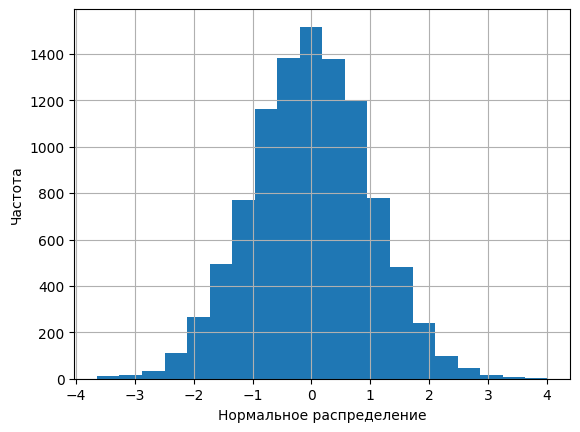

In [48]:
ex_1_17()